# Preprocessing Script

Um Redundanzen als Sicherheit zu schaffen und alle Zellen einzeln ausführbar zu machen, werden die Daten nach jeder Zelle als .pkl abgespeichert. Diese Files werden dann zu beginn der nächsten Zelle eingelesen

## Daten Importieren
Die Daten werden importiert und die id wird als index column gewählt.


In [1]:
import pandas as pd
ANNOTATORS = ["A001", "A002", "A003", "A004", "A005", "A007", "A008", "A009", "A010", "A012"]
ANNOTATIONS = ["0-Kein", "1-Gering", "2-Vorhanden", "3-Stark", "4-Extrem"]

LABEL_VALS_QUAL={"0-Kein": 0, "1-Gering": 1, "2-Vorhanden": 1, "3-Stark": 1, "4-Extrem": 1}
LABEL_VALS_QUANT={"0-Kein": 0, "1-Gering": 1, "2-Vorhanden": 2, "3-Stark": 3, "4-Extrem": 4}

In [13]:
dev_train = pd.read_json(path_or_buf="task_data/germeval-competition-traindev.jsonl", lines=True)
dev_test = pd.read_json(path_or_buf="task_data/germeval-competition-traindev.jsonl", lines=True)

dev_test.to_json("created_data/training_data/X_test.jsonl", orient='records', lines=True)

dev_train = dev_train.set_index('id')
dev_test = dev_test.set_index('id')

dev_train.to_pickle("created_data/preprocessing_data_cache/dev_train_after_import.pkl")
dev_test.to_pickle("created_data/preprocessing_data_cache/dev_test_after_import.pkl")


## Annotation Cols

Die Label Listen werden nach dem Annotator aufgeteilt sodass zu jedem Text 11 Annotator Labels (ggf. NaN) vorliegen. 

In [3]:
dev_train = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_after_import.pkl")
dev_test = pd.read_pickle("created_data/preprocessing_data_cache/dev_test_after_import.pkl")

#create a new dataframe with one column per annotator (plus text column)
dev_train_annotation_cols = pd.DataFrame(dev_train["text"], columns=["text", "avg"]+ANNOTATORS)

for idx, row in dev_train.iterrows():
    #loop over list in annotation field
    for dataset in row["annotations"]:
        #split list into entries for the annotator columns
        dev_train_annotation_cols[dataset['user']][idx] = dataset['label']
        
dev_train_annotation_cols.to_pickle("created_data/preprocessing_data_cache/dev_train_annotation_cols.pkl")

dev_train_X = pd.DataFrame(dev_train_annotation_cols["text"])
dev_train_X.to_pickle("created_data/preprocessing_data_cache/dev_train_X.pkl")

dev_train_y_all = pd.DataFrame(dev_train_annotation_cols[ANNOTATORS])

dev_train_y_all.to_pickle("created_data/preprocessing_data_cache/dev_train_y_All.pkl")

#save labels for each annotator separately
for annotator in ANNOTATORS:
    dev_train_y_a = pd.DataFrame(dev_train_annotation_cols[annotator][dev_train_annotation_cols[annotator].notnull()])
    dev_train_y_a.to_pickle(f"created_data/preprocessing_data_cache/dev_train_y_{annotator}.pkl")
dev_train_y_all

,A001,A002,A003,A004,A005,A007,A008,A009,A010,A012
id,,,,,,,,,,
a733e8a47708ce1d77060266d365e5b5,0-Kein,0-Kein,0-Kein,0-Kein,0-Kein,0-Kein,0-Kein,0-Kein,0-Kein,0-Kein
bf45fc2ac6742a7f75d5863c3338d59d,0-Kein,0-Kein,1-Gering,0-Kein,0-Kein,1-Gering,1-Gering,0-Kein,0-Kein,1-Gering
e1e80ff680f874d49ddfe33ac846a454,0-Kein,3-Stark,3-Stark,3-Stark,3-Stark,2-Vorhanden,4-Extrem,4-Extrem,4-Extrem,3-Stark
4689b9ccb5d79f222ba110f389cf1fb6,0-Kein,3-Stark,3-Stark,3-Stark,3-Stark,3-Stark,1-Gering,2-Vorhanden,0-Kein,3-Stark
a8d04dfc8e63b67f4587b04524605e3e,4-Extrem,4-Extrem,4-Extrem,4-Extrem,3-Stark,4-Extrem,2-Vorhanden,3-Stark,4-Extrem,2-Vorhanden
...,...,...,...,...,...,...,...,...,...,...
9bf20114b938ebe586073a61e1ed180c,NaN,2-Vorhanden,NaN,NaN,NaN,NaN,NaN,3-Stark,3-Stark,0-Kein
30b633296d7652efa94efeca713609d7,NaN,0-Kein,NaN,NaN,NaN,NaN,NaN,0-Kein,0-Kein,0-Kein
0917bc805a3b4c3086ee7101f2740dad,NaN,0-Kein,NaN,NaN,NaN,NaN,NaN,0-Kein,0-Kein,0-Kein


## Annotations Zählen
Für alle Annotatoren werden ihre Annotations gruppiert nach Klasse gezählt und gespeichert.

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import math

dev_train_annotation_cols = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_annotation_cols.pkl")

annotation_count = pd.DataFrame(index=["gesamt"]+ANNOTATORS, columns=ANNOTATIONS)

# count number of entries for each annotator
for annotator in ANNOTATORS:
    annotation_count.loc[annotator] = dev_train_annotation_cols[annotator].value_counts()
annotation_count.loc["gesamt"] = annotation_count.sum(axis='rows')

annotation_count.to_pickle("created_data/preprocessing_data_cache/dev_train_annotation_count.pkl")

## Label Piecharts

für jeden Annotator wird ein Piechart erstellt, welches die Verteilung seiner Annotations zeigt.

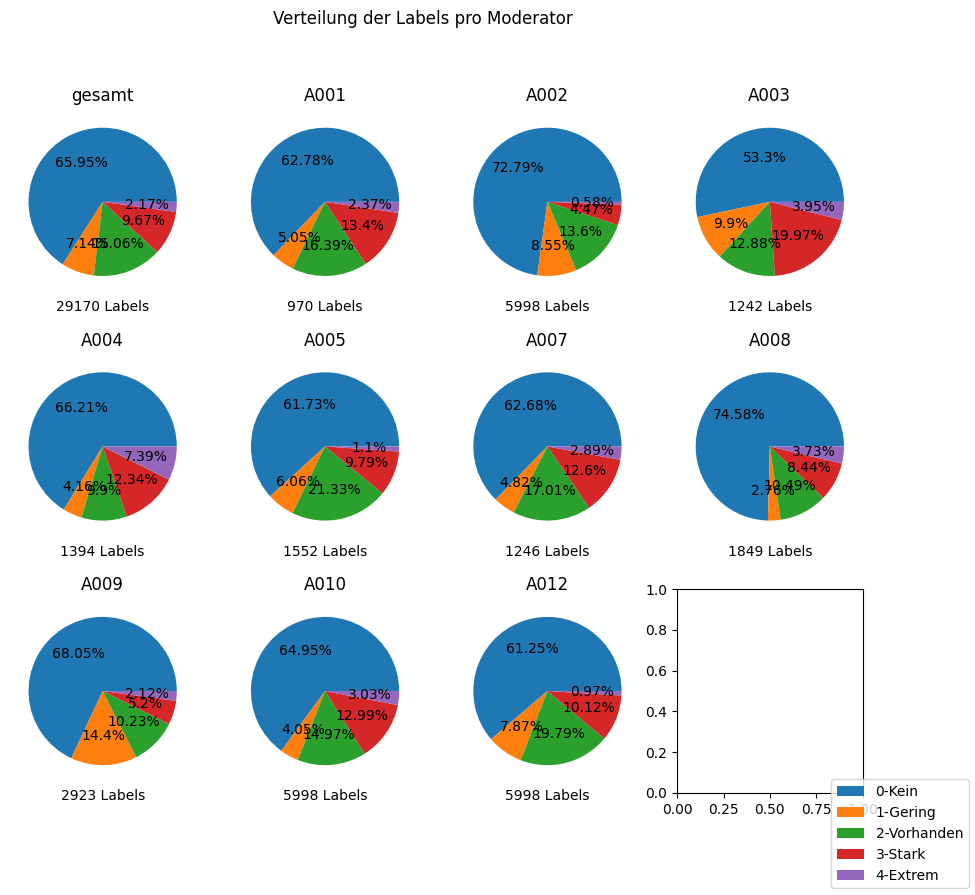

,0-Kein,1-Gering,2-Vorhanden,3-Stark,4-Extrem
gesamt,19237,2084,4394,2821,634
A001,609,49,159,130,23
A002,4366,513,816,268,35
A003,662,123,160,248,49
A004,923,58,138,172,103
A005,958,94,331,152,17
A007,781,60,212,157,36
A008,1379,51,194,156,69
A009,1989,421,299,152,62
A010,3896,243,898,779,182


In [5]:
annotation_count = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_annotation_count.pkl")

fig, axs = plt.subplots(3,4)
ax_idx = 0
for annotator in annotation_count.index:
    #callculate next ax
    ax = axs[math.floor(ax_idx / 4)][ax_idx % 4]
    
    #plot pie chart of row on next ax
    annotation_count.loc[annotator].plot.pie(ax=ax, figsize=(11,9), autopct= lambda pct: f"{round(pct, 2)}%", labels=None, title=annotator)
    annotator_label_count = annotation_count.loc[annotator][annotation_count.loc[annotator].notnull()].values.sum()
    ax.set(xlabel=f"{annotator_label_count} Labels", ylabel="")
    
    ax_idx += 1
    
fig.suptitle("Verteilung der Labels pro Moderator")
fig.legend(annotation_count.columns, loc="lower right")
plt.show()
annotation_count

[]

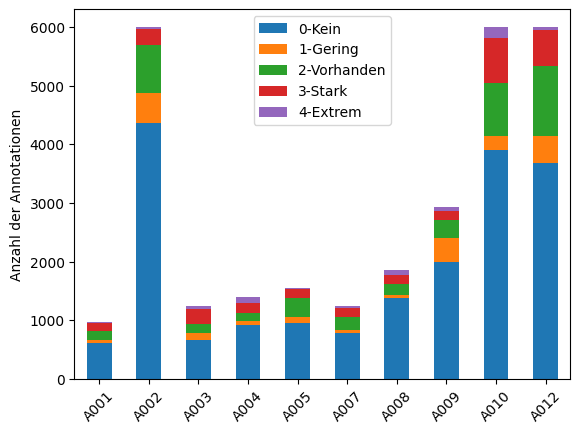

In [6]:
annotation_count.drop('gesamt').plot.bar(stacked=True)
plt.ylabel("Anzahl der Annotationen")
plt.xticks(rotation=45)
plt.plot()

## Label Anzahl Statistik
Es wird erfasst, wie vielen Datenpunkt wie viele unterschiedliche Labels zugeordnet sind. Bsp.: 

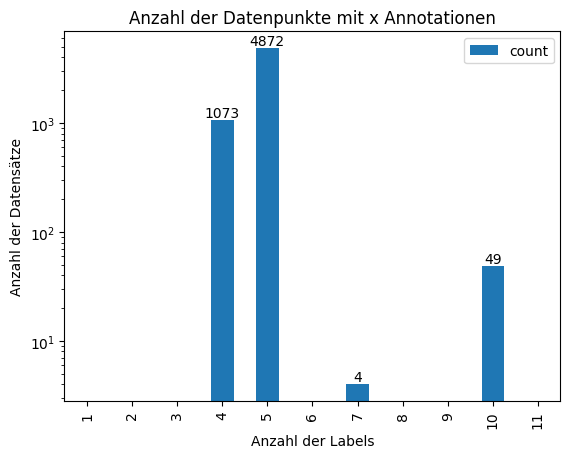

In [7]:
dev_train_y_all = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_All.pkl")
#count number of entries for each row
row_label_count = dev_train_y_all.count(axis='columns')

#count occurrence of entry-numbers (e.g. how many rows have 5 entries)  
occurrence_count = pd.DataFrame(row_label_count.value_counts(sort=False), index=range(1, 12)).fillna(0)

fig, ax = plt.subplots()
bars = occurrence_count.plot.bar(ax=ax)
ax.set_yscale("log")
ax.set_xlabel("Anzahl der Labels")
ax.set_ylabel("Anzahl der Datensätze")
ax.bar_label(ax.containers[0])
ax.set_title("Anzahl der Datenpunkte mit x Annotationen")
plt.show()

## Mean / Majority Calculation

In [8]:
dev_train_y_all = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_All.pkl")

dev_train_y_all_quant = dev_train_y_all.applymap(lambda x: LABEL_VALS_QUANT[x] if not pd.isna(x) else x)
dev_train_y_all_qual = dev_train_y_all.applymap(lambda x: LABEL_VALS_QUAL[x] if not pd.isna(x) else x)

dev_train_y_all_quant.to_pickle("created_data/preprocessing_data_cache/dev_train_y_all_quant.pkl")
dev_train_y_all_qual.to_pickle("created_data/preprocessing_data_cache/dev_train_y_all_qual.pkl")

dev_train_y_mean_major = pd.DataFrame(index=dev_train_y_all.index, columns=["mean_quant", "mean_qual", "majority_val", "majority_label"])
dev_train_y_mean_major["mean_quant"] = dev_train_y_all_quant.mean(axis='columns')
dev_train_y_mean_major["mean_qual"] = dev_train_y_all_qual.mean(axis='columns')
dev_train_y_mean_major["majority_label"] = dev_train_y_all.mode(axis='columns')[0]
dev_train_y_mean_major["majority_val"] = dev_train_y_mean_major["majority_label"].apply(lambda x: LABEL_VALS_QUANT[x])

dev_train_y_mean_major.to_pickle("created_data/preprocessing_data_cache/dev_train_y_mean_major.pkl")
dev_train_y_mean_major

,mean_quant,mean_qual,majority_val,majority_label
id,,,,
a733e8a47708ce1d77060266d365e5b5,0.0,0.00,0,0-Kein
bf45fc2ac6742a7f75d5863c3338d59d,0.4,0.40,0,0-Kein
e1e80ff680f874d49ddfe33ac846a454,2.9,0.90,3,3-Stark
4689b9ccb5d79f222ba110f389cf1fb6,2.1,0.80,3,3-Stark
a8d04dfc8e63b67f4587b04524605e3e,3.4,1.00,4,4-Extrem
...,...,...,...,...
9bf20114b938ebe586073a61e1ed180c,2.0,0.75,3,3-Stark
30b633296d7652efa94efeca713609d7,0.0,0.00,0,0-Kein
0917bc805a3b4c3086ee7101f2740dad,0.0,0.00,0,0-Kein


## Annotator Bias

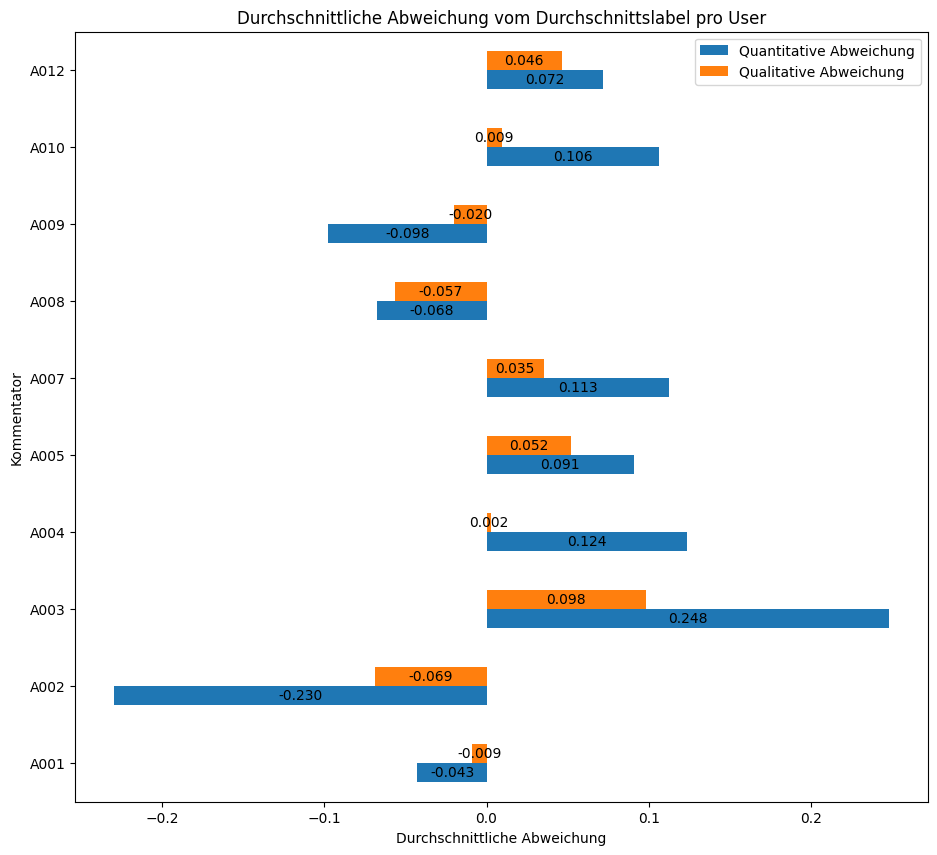

In [9]:
dev_train_y_all=pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_All.pkl")
dev_train_y_mean_major = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_mean_major.pkl")
dev_train_y_all_quant = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_all_quant.pkl")
dev_train_y_all_qual = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_all_qual.pkl")

dev_train_quant_diff = pd.DataFrame(index=dev_train_y_all.index, columns=ANNOTATORS)
dev_train_qual_diff = pd.DataFrame(index=dev_train_y_all.index, columns=ANNOTATORS)

for idx, mean_row in dev_train_y_mean_major.iterrows():
    quant_row = dev_train_y_all_quant.loc[idx]
    qual_row = dev_train_y_all_qual.loc[idx]
    not_null_mask = quant_row.notnull()
    
    dev_train_quant_diff.loc[idx] = quant_row[not_null_mask] - mean_row['mean_quant']
    dev_train_qual_diff.loc[idx] = qual_row[not_null_mask] - mean_row['mean_qual']

dev_train_bias = pd.DataFrame(index=["quant", "qual"], columns=ANNOTATORS)
dev_train_bias.loc["quant"] = dev_train_quant_diff.mean()
dev_train_bias.loc["qual"] = dev_train_qual_diff.mean()

ax = dev_train_bias.transpose().plot.barh(figsize=(11, 10))
ax.set_xlabel("Durchschnittliche Abweichung")
ax.set_ylabel("Kommentator")
ax.set_title("Durchschnittliche Abweichung vom Durchschnittslabel pro User")
ax.bar_label(ax.containers[0], fmt="%.3f", label_type="center")
ax.bar_label(ax.containers[1], fmt="%.3f", label_type="center")
ax.legend(["Quantitative Abweichung", "Qualitative Abweichung"])
plt.show()

## Correlation

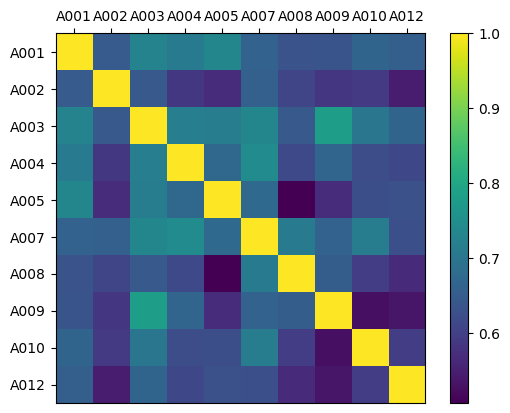

In [10]:
dev_train_y_all_quant: pd.DataFrame = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_all_quant.pkl")
dev_train_y_all_qual = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_all_qual.pkl")

correlation_quant = dev_train_y_all_quant.corr(method='kendall')
plt.imshow(correlation_quant, cmap='viridis')
plt.colorbar()
plt.xticks(range(0, 10), ANNOTATORS)
plt.yticks(range(0, 10), ANNOTATORS)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

## Train / Val Split

In [11]:
from sklearn.model_selection import train_test_split

#load Data
X_all = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_X.pkl")
y_all = pd.read_pickle("created_data/preprocessing_data_cache/dev_train_y_All.pkl")

#split y
y_train: pd.DataFrame
y_val: pd.DataFrame
y_train, y_val = train_test_split(y_all, train_size=0.8, test_size=0.2)

#correspondingly split X
X_train: pd.DataFrame = X_all.loc[y_train.index]
X_val: pd.DataFrame = X_all.loc[y_val.index]

y_train = y_train.applymap(lambda x: LABEL_VALS_QUANT[x] if not pd.isna(x) else x)
y_val = y_val.applymap(lambda x: LABEL_VALS_QUANT[x] if not pd.isna(x) else x)
y_all = y_all.applymap(lambda x: LABEL_VALS_QUANT[x] if not pd.isna(x) else x)

#add id to columns, so it will be written to the file too.
y_train["id"] = y_train.index
y_val["id"] = y_val.index
y_all["id"] = y_all.index
X_train["id"] = X_train.index
X_val["id"] = X_val.index
X_all["id"] = X_all.index




#write to jsonl files
y_train.to_json("created_data/training_data/y_train.jsonl", orient='records', lines=True)
y_val.to_json("created_data/training_data/y_val.jsonl", orient='records', lines=True)
y_all.to_json("created_data/training_data/y_all.jsonl", orient='records', lines=True)
X_train.to_json("created_data/training_data/X_train.jsonl", orient='records', lines=True)
X_val.to_json("created_data/training_data/X_val.jsonl", orient='records', lines=True)
X_all.to_json("created_data/training_data/X_all.jsonl", orient='records', lines=True)
#same steps for each annotato

for annotator in ANNOTATORS:
    y_train_anno_series = y_train[annotator].dropna()
    y_val_anno_series = y_val[annotator].dropna()
    
    y_train_anno = pd.DataFrame(y_train_anno_series, index=y_train_anno_series.index, columns=[annotator, 'id'])
    y_val_anno = pd.DataFrame(y_val_anno_series, index=y_val_anno_series.index, columns=[annotator, 'id'])
    
    X_train_anno = X_train.loc[y_train_anno.index]
    X_val_anno = X_val.loc[y_val_anno.index]
    
    y_train_anno['id'] = y_train_anno.index
    y_val_anno['id'] = y_val_anno.index

    y_train_anno.to_json(f"created_data/training_data/y_train_{annotator}.jsonl", orient='records', lines=True)
    y_val_anno.to_json(f"created_data/training_data/y_val_{annotator}.jsonl", orient='records', lines=True)
    X_train_anno.to_json(f"created_data/training_data/X_train_{annotator}.jsonl", orient='records', lines=True)
    X_val_anno.to_json(f"created_data/training_data/X_val_{annotator}.jsonl", orient='records', lines=True)
    
    print(f"{annotator}:\n  len(X_train): {len(X_train_anno)} \n  len(X_val): {len(X_val_anno)} \n")

A001:
  len(X_train): 788 
  len(X_val): 182 

A002:
  len(X_train): 4798 
  len(X_val): 1200 

A003:
  len(X_train): 986 
  len(X_val): 256 

A004:
  len(X_train): 1121 
  len(X_val): 273 

A005:
  len(X_train): 1252 
  len(X_val): 300 

A007:
  len(X_train): 1012 
  len(X_val): 234 

A008:
  len(X_train): 1467 
  len(X_val): 382 

A009:
  len(X_train): 2348 
  len(X_val): 575 

A010:
  len(X_train): 4798 
  len(X_val): 1200 

A012:
  len(X_train): 4798 
  len(X_val): 1200 
